In [2]:
%config Completer.use_jedi = False

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras

sns.set() 

## Analysis and preprocessing

In [3]:
raw_data = pd.read_csv('../datasets/bank.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
x = raw_data.drop('loan', axis=1)
y = raw_data['loan'].copy()
x_data, x_test, y_data, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
data = x_data.assign(loan=y_data)

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,loan
9744,54,blue-collar,divorced,primary,no,215,yes,unknown,4,jun,71,5,-1,0,unknown,no,no
6795,52,technician,married,unknown,no,425,yes,cellular,28,jan,219,2,254,3,failure,no,no
4770,33,management,married,tertiary,no,679,no,cellular,5,aug,1109,2,-1,0,unknown,yes,no
4682,30,services,single,secondary,no,-158,yes,cellular,12,may,426,1,370,2,failure,yes,no
1355,43,admin.,married,secondary,no,132,no,cellular,17,mar,220,1,-1,0,unknown,yes,no


In [6]:
def createCategoryPlot(column, data, figsize=(8, 6)):
    vals = data[column].value_counts()
    plt.figure(figsize=figsize)
    sns.barplot(x=vals.values, y=vals.index)
    plt.xlabel('Count')
    plt.ylabel(column.capitalize())
    plt.show()

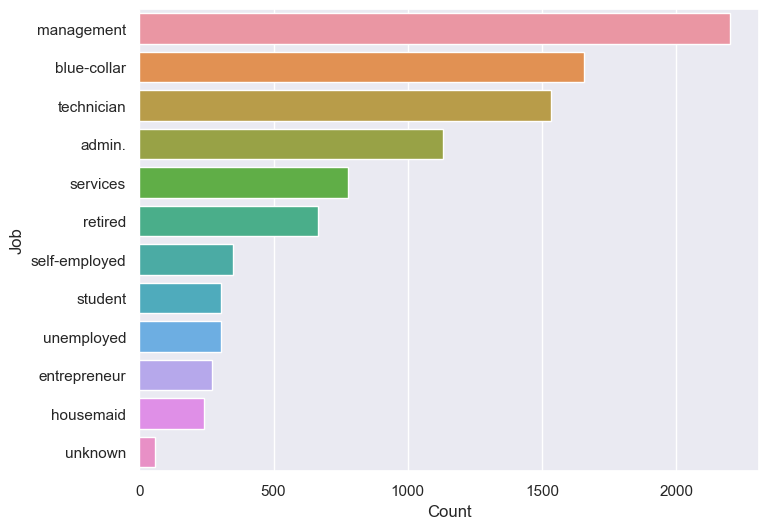

In [7]:
createCategoryPlot('job', data)

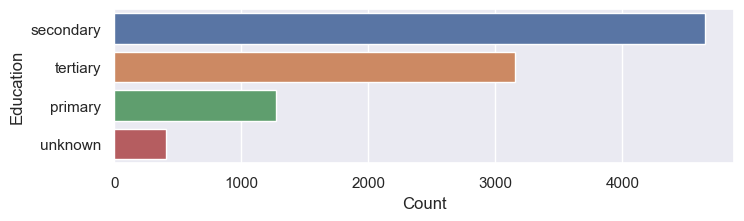

In [8]:
createCategoryPlot('education', data, (8, 2))

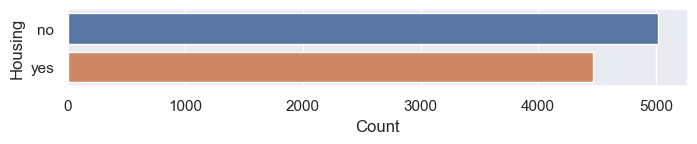

In [9]:
createCategoryPlot('housing', data, (8, 1))

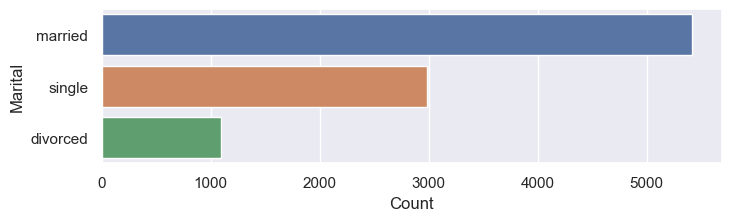

In [10]:
createCategoryPlot('marital', data, (8, 2))

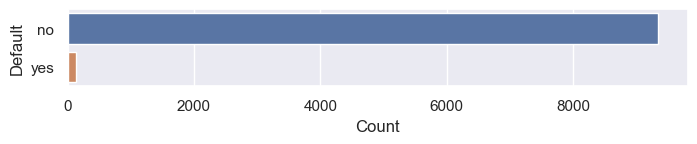

In [11]:
createCategoryPlot('default', data, (8, 1))

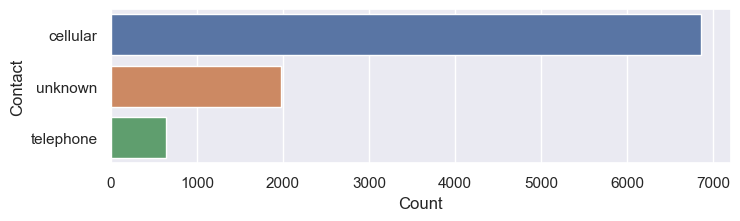

In [12]:
createCategoryPlot('contact', data, (8, 2))

In [13]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,9487.000000,9487.000000,9487.000000,9487.000000,9487.000000,9487.000000,9487.000000
mean,41.221883,1525.487298,15.645937,369.627596,2.507115,50.688416,0.810056
std,11.872184,3152.514845,8.431388,344.716713,2.703206,108.353511,2.199508
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,119.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,544.000000,15.000000,254.000000,2.000000,-1.000000,0.000000
75%,49.000000,1716.000000,22.000000,492.000000,3.000000,2.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


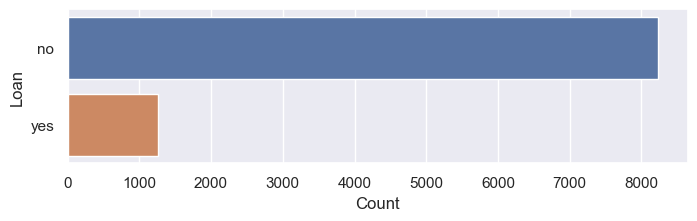

In [14]:
createCategoryPlot('loan', data, (8, 2))

In [15]:
data.isnull().sum().sort_values(ascending=False)

age          0
month        0
deposit      0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
day          0
job          0
contact      0
housing      0
balance      0
default      0
education    0
marital      0
loan         0
dtype: int64

In [16]:
def encode_labels(data, cols_to_encode):
    label_encoders = {}
    new_data = data.copy()
    
    for col in cols_to_encode:
        label_encoders[col] = LabelEncoder()

    for col in cols_to_encode:
        new_data[col] = label_encoders[col].fit_transform(new_data[col])
        
    return new_data, label_encoders

In [17]:
def describe_encoders(label_encoders):
    print("List of encoded values:")
    for encoder in label_encoders.values():
        for index, cl in enumerate(encoder.classes_):
            print(f'{index} : {cl}')

In [18]:
cols_to_encode = ['loan', 'job', 'education', 'housing', 'marital', 'default', 'contact', 'month', 'poutcome', 'deposit']
data, label_encoders = encode_labels(data, cols_to_encode)

In [19]:
describe_encoders(label_encoders)

List of encoded values:
0 : no
1 : yes
0 : admin.
1 : blue-collar
2 : entrepreneur
3 : housemaid
4 : management
5 : retired
6 : self-employed
7 : services
8 : student
9 : technician
10 : unemployed
11 : unknown
0 : primary
1 : secondary
2 : tertiary
3 : unknown
0 : no
1 : yes
0 : divorced
1 : married
2 : single
0 : no
1 : yes
0 : cellular
1 : telephone
2 : unknown
0 : apr
1 : aug
2 : dec
3 : feb
4 : jan
5 : jul
6 : jun
7 : mar
8 : may
9 : nov
10 : oct
11 : sep
0 : failure
1 : other
2 : success
3 : unknown
0 : no
1 : yes


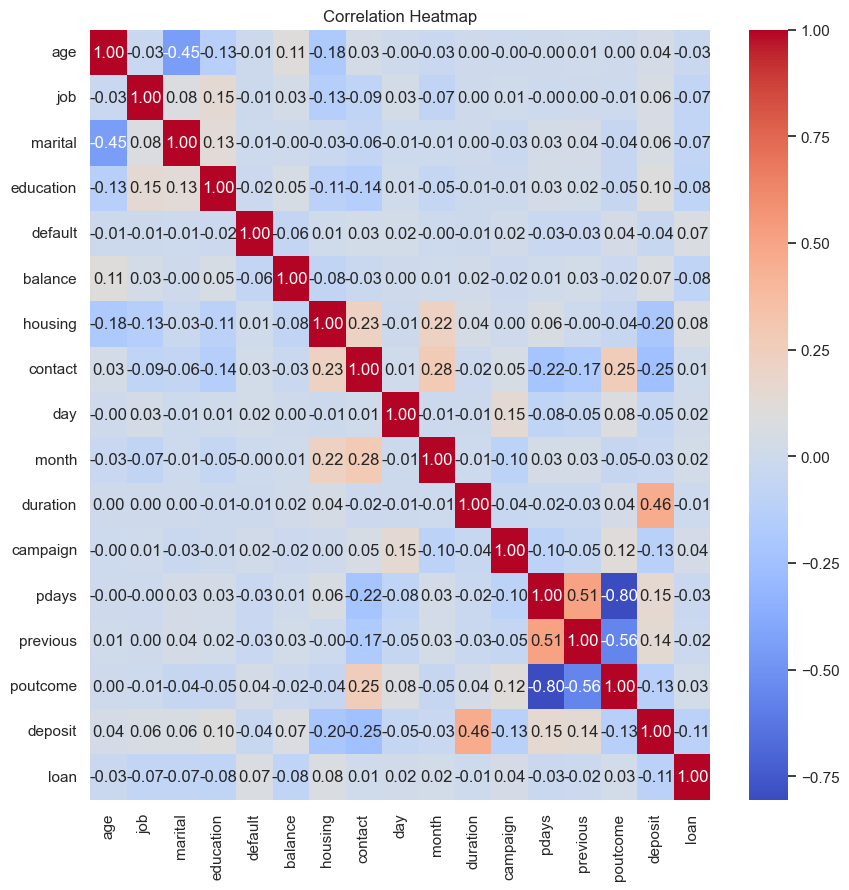

In [20]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
data.head()

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,loan
9744,54,1,0,0,0,215,1,2,4,6,71,5,-1,0,3,0,0
6795,52,9,1,3,0,425,1,0,28,4,219,2,254,3,0,0,0
4770,33,4,1,2,0,679,0,0,5,1,1109,2,-1,0,3,1,0
4682,30,7,2,1,0,-158,1,0,12,8,426,1,370,2,0,1,0
1355,43,0,1,1,0,132,0,0,17,7,220,1,-1,0,3,1,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9487 entries, 9744 to 7270
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        9487 non-null   int64
 1   job        9487 non-null   int32
 2   marital    9487 non-null   int32
 3   education  9487 non-null   int32
 4   default    9487 non-null   int32
 5   balance    9487 non-null   int64
 6   housing    9487 non-null   int32
 7   contact    9487 non-null   int32
 8   day        9487 non-null   int64
 9   month      9487 non-null   int32
 10  duration   9487 non-null   int64
 11  campaign   9487 non-null   int64
 12  pdays      9487 non-null   int64
 13  previous   9487 non-null   int64
 14  poutcome   9487 non-null   int32
 15  deposit    9487 non-null   int32
 16  loan       9487 non-null   int32
dtypes: int32(10), int64(7)
memory usage: 963.5 KB


In [23]:
data.shape

(9487, 17)

In [24]:
x = data.drop('loan', axis=1)
y = data['loan'].copy()
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

### Exporting data

In [36]:
x_train.to_csv('bank_x_train.csv', index=False)
y_train.to_csv('bank_y_train.csv', index=False)
x_val.to_csv('bank_x_val.csv', index=False)
y_val.to_csv('bank_y_val.csv', index=False)

## Training

In [25]:
forest = RandomForestClassifier(random_state=42, n_estimators=25)
forest.fit(x_train, y_train)

y_pred = forest.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8616573033707865


In [30]:
accuracy_list = []

for n in range (1, 100):
    forest = RandomForestClassifier(random_state=42, n_estimators=n)
    forest.fit(x_train, y_train)
    
    y_pred = forest.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    accuracy_list.append(accuracy)


<AxesSubplot:>

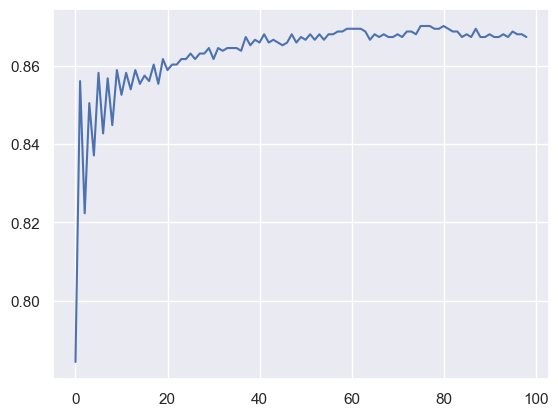

In [31]:
sns.lineplot(x=range(len(accuracy_list)), y=accuracy_list)

In [32]:
param_grid = {
    'n_estimators' : [55, 60, 65],
    'max_depth': [3, 4, 5, 6, 7, 8, None],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

forest = RandomForestClassifier()

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_best_params = grid_search.best_params_

In [33]:
grid_best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 60}

In [34]:
forest = RandomForestClassifier(
    random_state=42, 
    n_estimators=60, 
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1
)
forest.fit(x_train, y_train)

y_pred = forest.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8679775280898876
